In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def read_csv_file(filename, skiprows=2, num_samples=-1):
    data = pd.read_csv(
        filename,
        delimiter=";",
        skiprows=skiprows,
        decimal=",",
        names=["zeit", "spannung"],
    )

    if num_samples > 0:
        return data[:num_samples]
    return data

read_csv_file("Messung-normal.csv")

,zeit,spannung
0,-25.006666,0.185162
1,-25.001666,0.000000
2,-24.996666,0.000000
3,-24.991666,-0.185162
4,-24.986666,0.185162
...,...,...
9999,24.988333,0.556102
10000,24.993333,0.185162
10001,24.998333,0.370325
10002,25.003333,0.556102


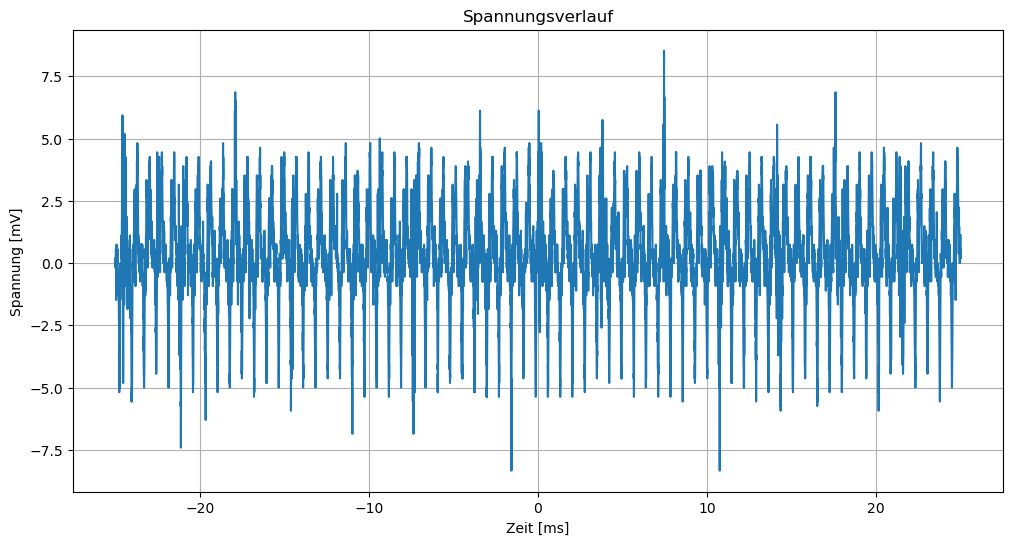

In [6]:
def plot_data(data):
    # Plotten der Daten
    plt.figure(figsize=(12, 6))
    plt.plot(data["zeit"], data["spannung"], label="Messdaten")
    plt.xlabel('Zeit [ms]')
    plt.ylabel('Spannung [mV]')
    plt.title('Spannungsverlauf')
    plt.grid(True)
    plt.show()

plot_data(read_csv_file("Messung-normal.csv"))

### Fourier-Transformation

In [7]:
data = read_csv_file("Messung-normal.csv")
time_data = data["zeit"]
voltage_data = data["spannung"]
signal_duration = time_data.iloc[-1] - time_data.iloc[0]  # Signaldauer
sampling_frequency = 1000 / np.mean(np.diff(time_data))  # Abtastfrequenz
num_samples = len(time_data)  # Anzahl der Abtastpunkte
sampling_interval = np.mean(np.diff(time_data))  # Abtastintervall

print(f"Signaldauer: {signal_duration:.6f} ms")
print(f"Abtastfrequenz: {sampling_frequency:.2f} Hz")
print(f"Signallänge (M): {num_samples}")
print(f"Abtastintervall (Δt): {sampling_interval:.6e} ms")

Signaldauer: 50.014999 ms
Abtastfrequenz: 200000.01 Hz
Signallänge (M): 10004
Abtastintervall (Δt): 5.000000e-03 ms


### Grundperiode bestimmen

Wir suchen nach dem Abstand zwischen Wiederholungen (Perioden) 
und dann den Mittelwert der Perioden als Grundperiode berechnen

In [38]:
def partial_plot(time, volt):
    plt.figure(figsize=(12, 6))
    plt.plot(time, volt, label="Messdaten")
    plt.xlabel('Zeit [ms]')
    plt.ylabel('Spannung [mV]')
    plt.title('Spannungsverlauf')
    plt.grid(True)
    plt.show()

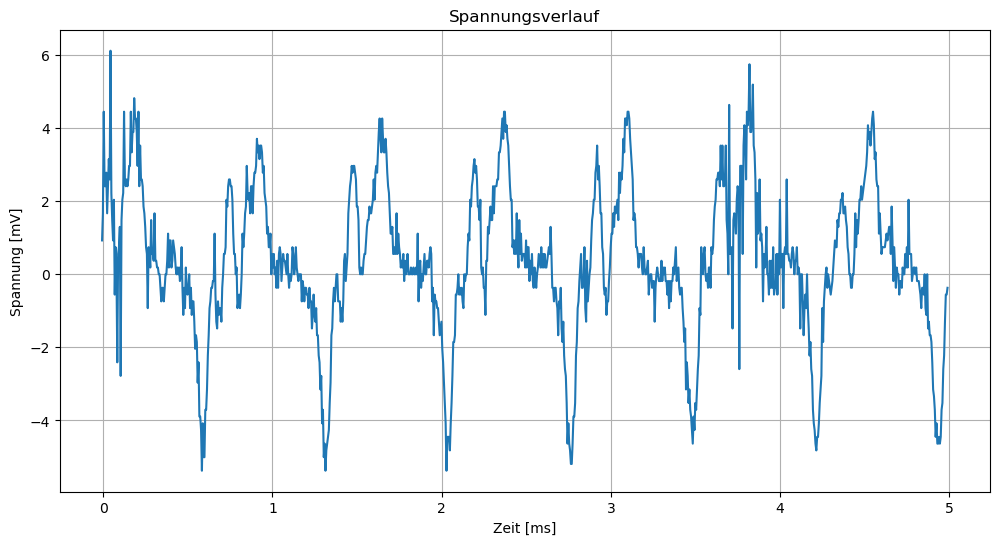

Grundperiode: 0.600 ms
Grundperiode: 1666.667 Hz


In [57]:
index = 5000
new_data = data[index:index + 1000]
new_zeit = new_data['zeit']
new_volt = new_data['spannung']

partial_plot(new_zeit, new_volt)

grundperiode = (1.25) - (0.65)
print(f"Grundperiode: {grundperiode:.3f} ms")
grundfrequenz = 1000 / grundperiode
print(f"Grundperiode: {grundfrequenz:.3f} Hz")

In [7]:
def fourier_transform(data):
    # Berechnung der Fourier-Koeffizienten
    time = data["zeit"]
    signal = data["spannung"]

    M = len(time)
    delta_t = 0.001 * (time[1] - time[0])

    amplitude_spectrum = np.abs(np.fft.fft(signal)) / M
    freq = np.fft.fftfreq(M, d=delta_t)[:M // 2]

    return freq, amplitude_spectrum[:M // 2]

fourier_transform(read_csv_file("Messung-normal.csv"))

(array([0.00000000e+00, 1.99920032e+01, 3.99840064e+01, ...,
        9.99400240e+04, 9.99600160e+04, 9.99800080e+04]),
 array([0.37078162, 0.00502547, 0.00117683, ..., 0.00328216, 0.00250585,
        0.00692163]))

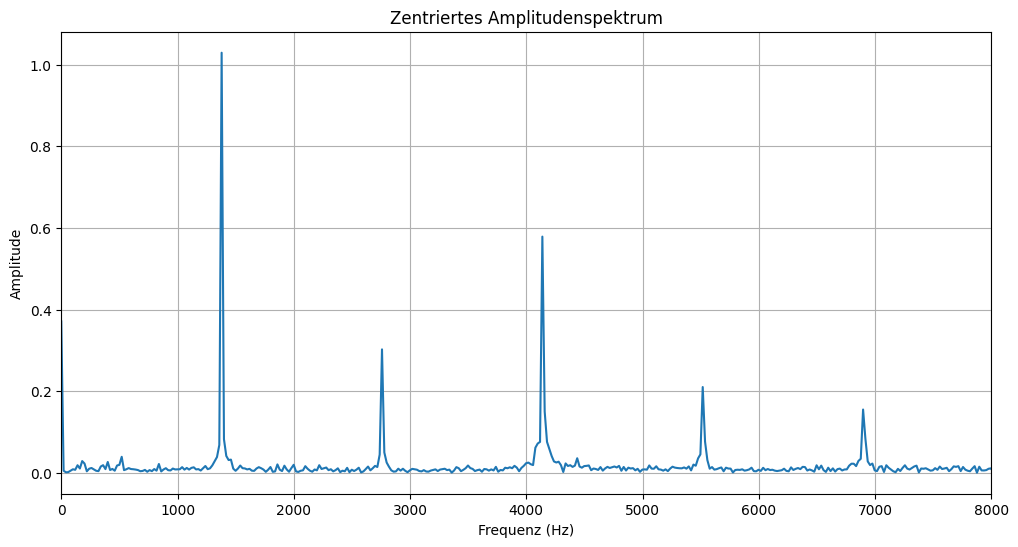

In [8]:
def plot_fft(freq, amplitude_spectrum):
    plt.figure(figsize=(12, 6))
    plt.plot(freq, amplitude_spectrum)
    plt.title("Zentriertes Amplitudenspektrum")
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 8000)
    plt.grid(True)
    plt.show()

data = read_csv_file("Messung-normal.csv")
freq, amplitude_spectrum = fourier_transform(data)
plot_fft(freq, amplitude_spectrum)

In [9]:
fundamental_freq_index = np.argmax(amplitude_spectrum[1:]) + 1
fundamental_freq = freq[fundamental_freq_index]
fundamental_amplitude = amplitude_spectrum[fundamental_freq_index]

print(f"Grundfrequenz: {fundamental_freq:.2f} Hz")
print(f"Amplitude der Grundfrequenz: {fundamental_amplitude:.2f}")

Grundfrequenz: 1379.45 Hz
Amplitude der Grundfrequenz: 1.03


## Frequenzgang von Lautsprechern


##### Graphisch darstellen

In [10]:
def read_csv_file_mic(filename, skiprows=1, num_samples=-1):
    data = pd.read_csv(
        filename,
        delimiter=";",
        skiprows=skiprows,
        decimal=",",
        names=["freq", "amp-a", "amp-b", "phase"]
    )

    # Convert amp-b from milliVolt to Volt
    data["amp-b"] = data["amp-b"] / 1000.0
    # Convert phase from ms to s
    data["phase"] = data["phase"] / 1000.0
    # Calculate amp as amp-b / amp-a
    data["amp"] = data["amp-b"] / data["amp-a"]

    if num_samples > 0:
        return data[["freq", "amp", "phase"]][:num_samples]
    return data[["freq", "amp", "phase"]]
read_csv_file_mic("Messung-groß.csv")

,freq,amp,phase
0,100,0.016441,0.004480
1,200,0.050771,0.004362
2,300,0.034906,0.000100
3,400,0.027983,0.000254
4,500,0.023076,0.000342
5,700,0.018170,0.000232
6,850,0.017017,0.000180
7,1000,0.017882,0.000180
8,1200,0.018170,0.000210
9,1500,0.017882,0.000201


In [11]:
read_csv_file_mic("Messung-klein.csv")

,freq,amp,phase
0,100,0.008365,0.003300
1,200,0.012694,0.002740
2,300,0.014424,0.002200
3,400,0.020194,0.001810
4,500,0.032017,0.001537
5,700,0.027694,0.000212
6,850,0.020777,0.000260
7,1000,0.017882,0.000227
8,1200,0.016441,0.000194
9,1500,0.017306,0.000183


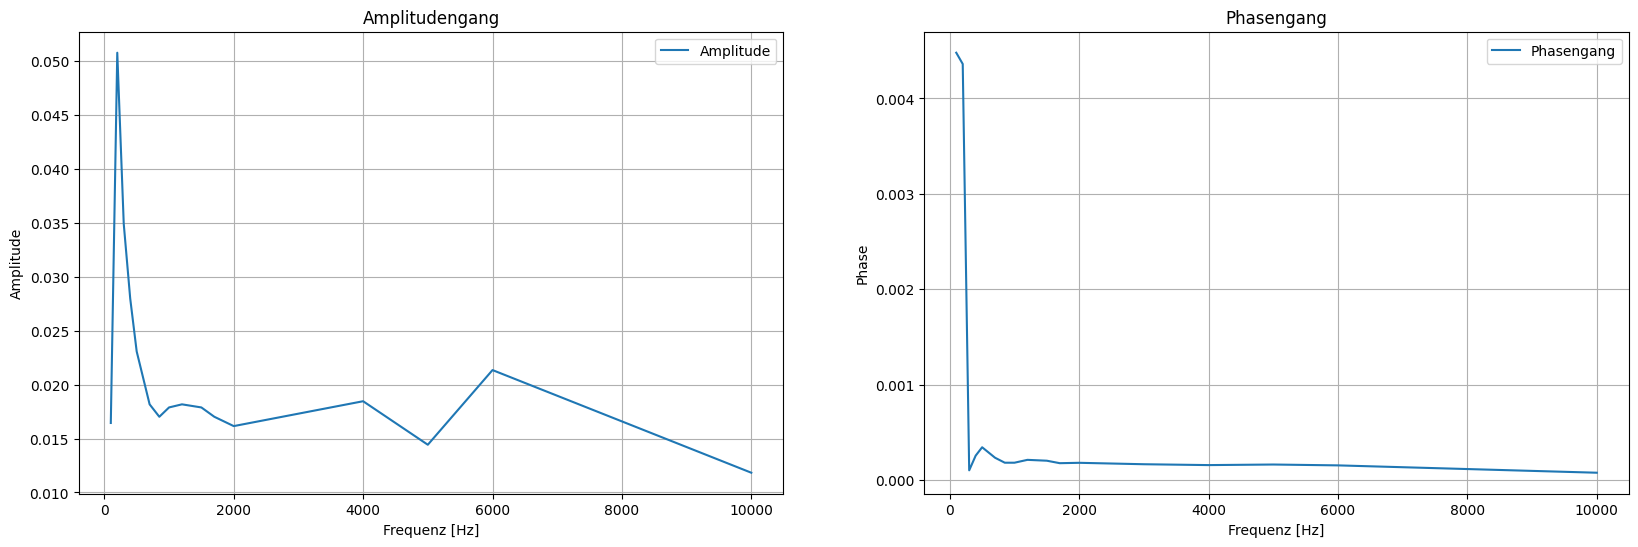

In [12]:
def plot_mic_data(data):
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plt.plot(data["freq"], data["amp"], label="Amplitude")
    plt.xlabel("Frequenz [Hz]")
    plt.ylabel("Amplitude")
    plt.title("Amplitudengang")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(data["freq"], data["phase"], label="Phasengang")
    plt.xlabel("Frequenz [Hz]")
    plt.ylabel("Phase")
    plt.title("Phasengang")
    plt.grid(True)
    plt.legend()

    plt.show()

plot_mic_data(read_csv_file_mic("Messung-groß.csv"))

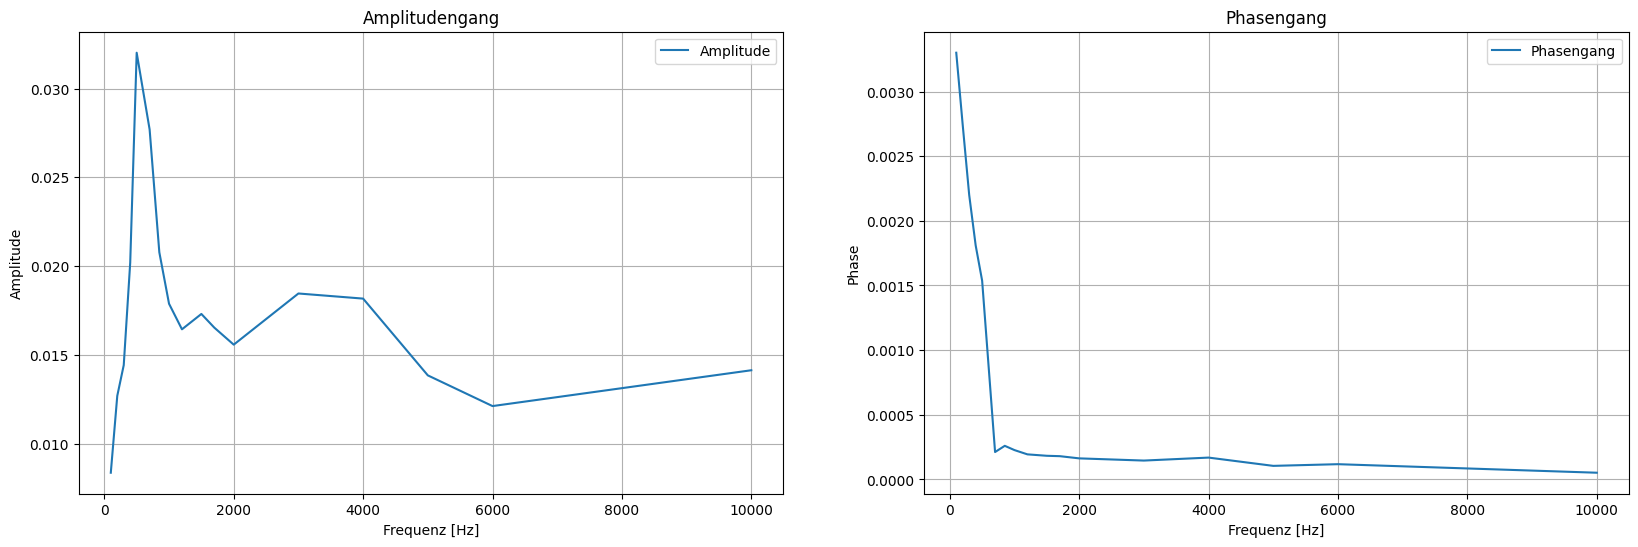

In [13]:
plot_mic_data(read_csv_file_mic("Messung-klein.csv"))

### Bode-Diagramm:

In [14]:
def bode_diagram(data):
    amplitude_db = 20 * np.log10(data["amp"])
    phase_deg = -data["phase"] * data["freq"] * 360
    return np.column_stack((amplitude_db, phase_deg))

bode_diagram(read_csv_file_mic("Messung-groß.csv"))

array([[ -35.6814255 , -161.28      ],
       [ -25.88772372, -314.064     ],
       [ -29.14195695,  -10.8       ],
       [ -31.06224687,  -36.576     ],
       [ -32.73663601,  -61.56      ],
       [ -34.81278611,  -58.464     ],
       [ -35.38212245,  -55.08      ],
       [ -34.95165996,  -64.8       ],
       [ -34.81278611,  -90.72      ],
       [ -34.95165996, -108.54      ],
       [ -35.38212245, -107.1       ],
       [ -35.83503561, -128.88      ],
       [ -35.2362517 , -177.12      ],
       [ -34.67609774, -223.2       ],
       [ -36.81853112, -289.8       ],
       [ -33.41318773, -328.32      ],
       [ -38.54048227, -270.        ]])

In [15]:
def bode_plot(data, db):
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.semilogx(data["freq"], db[:, 0])
    ax1.set_xlabel("Frequenz [Hz]")
    ax1.set_ylabel("Amplitude [dB]")
    ax1.set_title("Amplitudengang")
    ax1.grid(which="both", linestyle="--", linewidth=0.5)
    ax1.set_xticks(data["freq"])
    ax1.set_xticklabels(
    [f"{int(freq)}" if freq < 1000 else f"{int(freq / 1000)}k" for freq in data["freq"]]
    )

    ax2 = fig.add_subplot(gs[0, 1], projection="polar")
    ax2.set_theta_zero_location("N")
    ax2.set_theta_direction(-1)
    ax2.plot(np.deg2rad(db[:, 1]), data["freq"])
    ax2.set_title("Phasengang")
    ax2.set_xticks(np.deg2rad(np.arange(0, 360, 15)))
    ax2.set_xticklabels([f"{int(deg)}°" for deg in np.arange(0, 360, 15)])
    ax2.grid(which="both", linestyle="--", linewidth=0.5)

    ax3 = fig.add_subplot(gs[1, :])  # Span across both columns
    ax3.plot(data["freq"], db[:, 1])
    ax3.set_xlabel("Frequenz [Hz]")
    ax3.set_ylabel("Phase [°]")
    ax3.set_title("Phasengang (linear)")
    ax3.set_xticks(data["freq"])
    ax3.set_xticklabels(
        [f"{int(freq)}" if freq < 1000 else f"{int(freq / 1000)}k" for freq in data["freq"]]
    )
    ax3.grid(which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

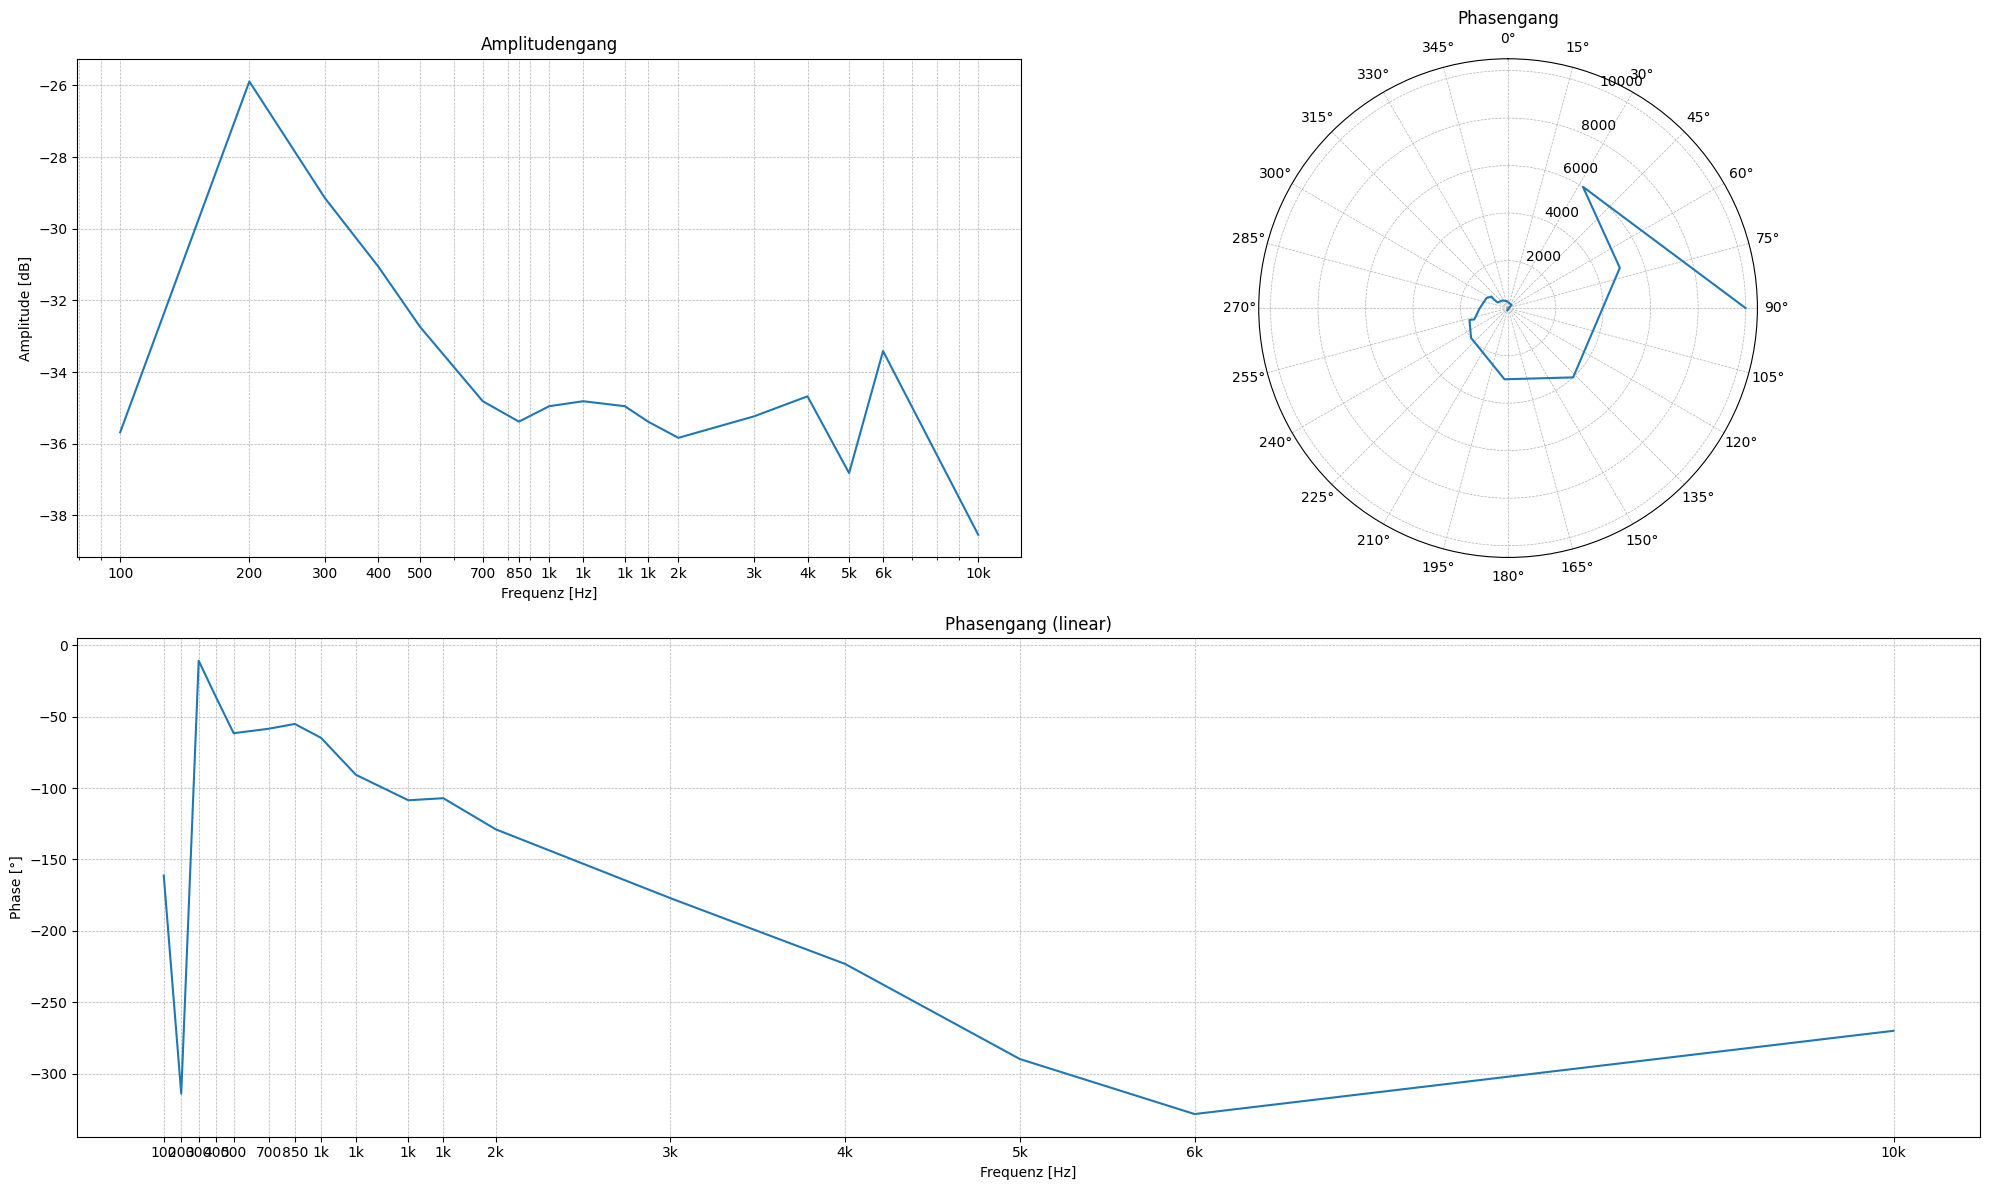

In [16]:
data = read_csv_file_mic("Messung-groß.csv")
db = bode_diagram(data)
bode_plot(data, db)

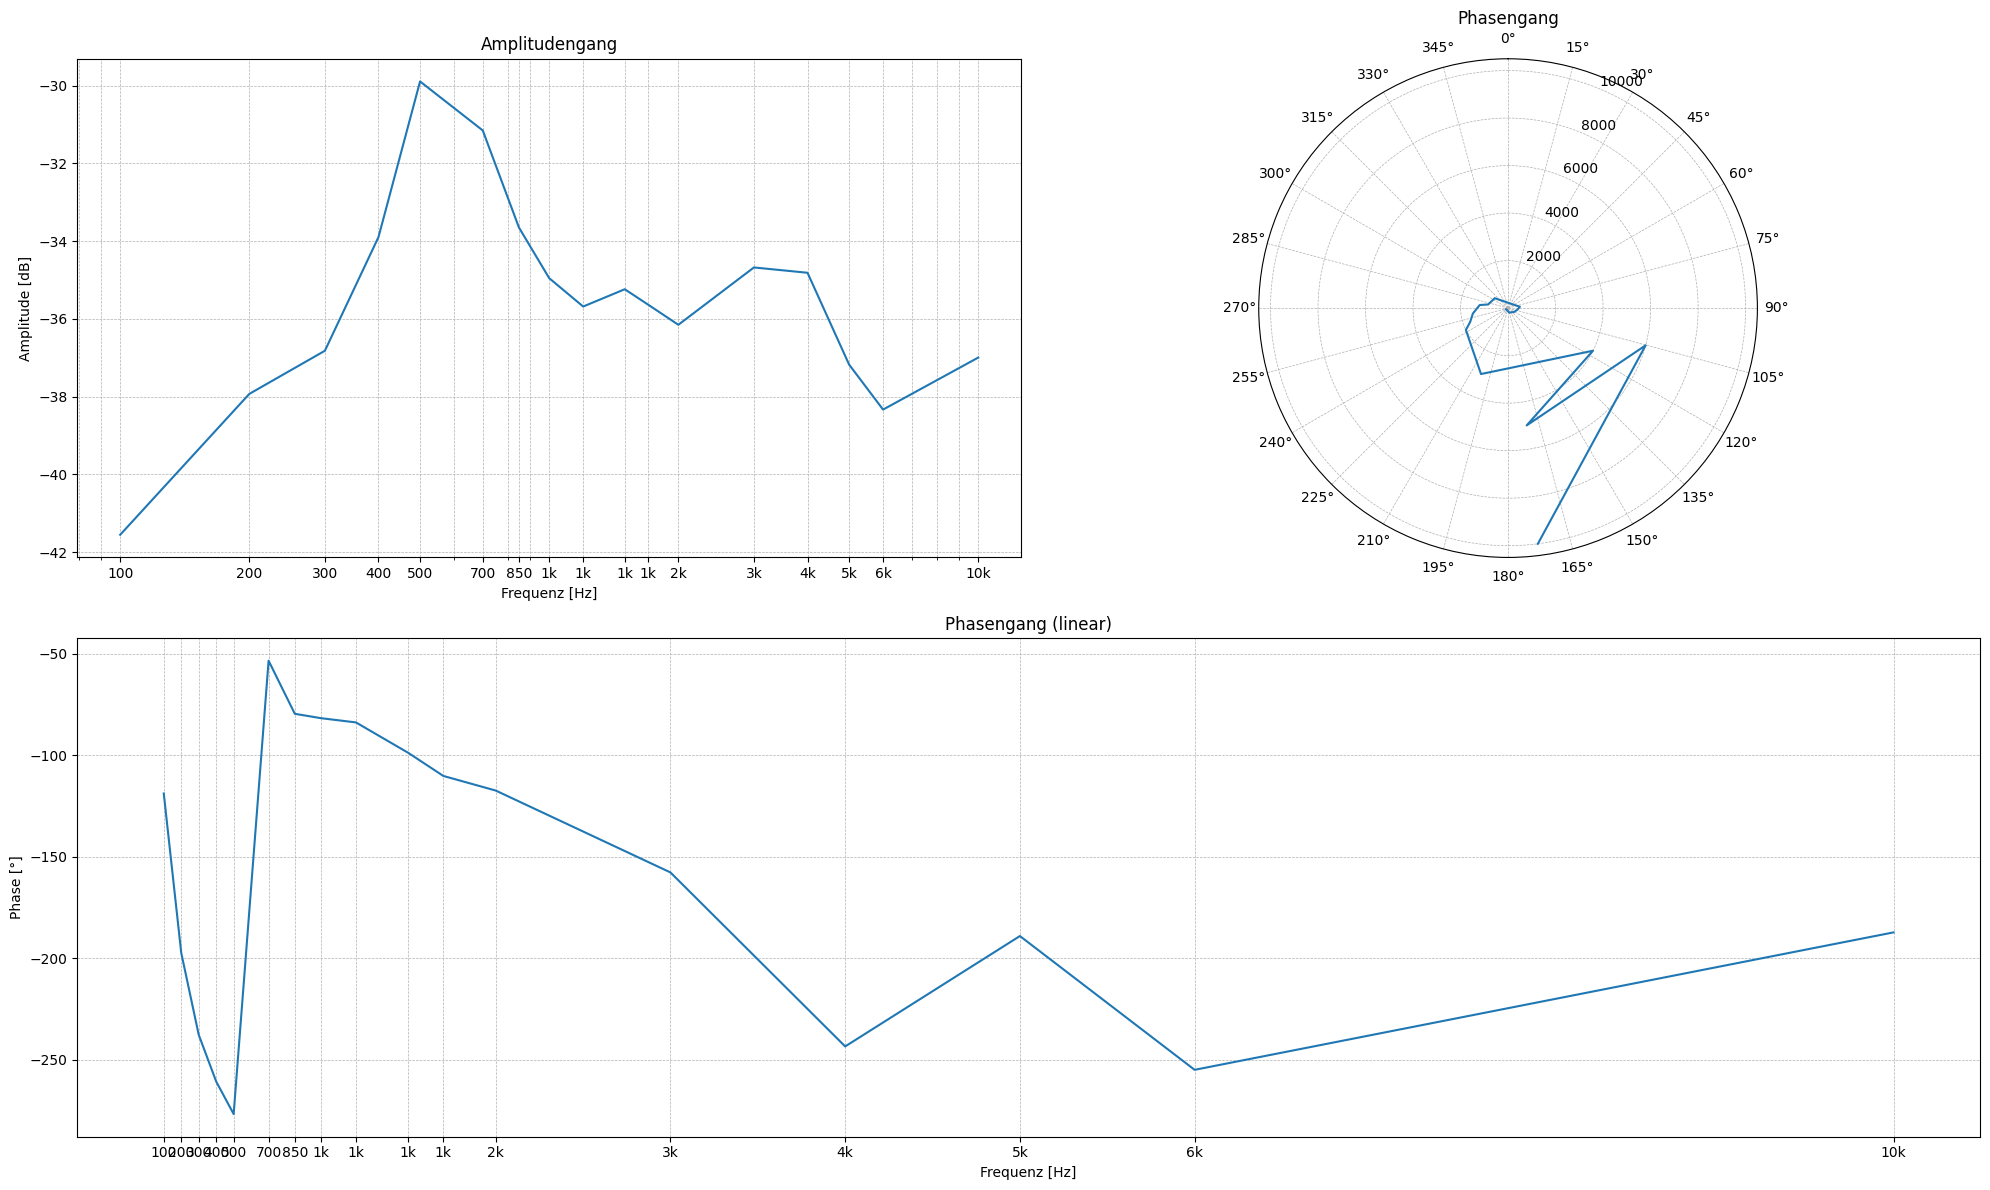

In [17]:
data = read_csv_file_mic("Messung-klein.csv")
db = bode_diagram(data)
bode_plot(data, db)